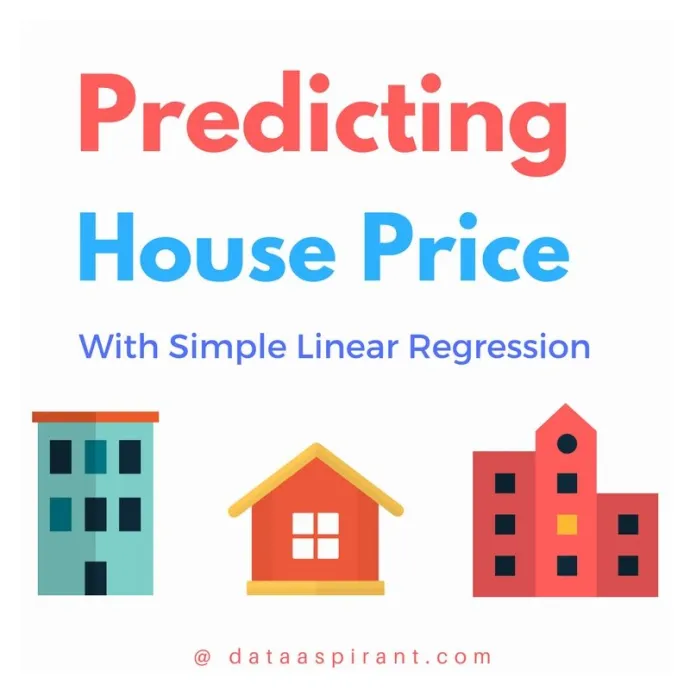

**PREDICTING HOUSE PRICES WITH LINEAR REGRESSION**

**Introduction**

This project aims to predict house prices using linear regression. We'll explore a dataset, clean and prepare the data, select relevant features, train a linear regression model, evaluate its performance, and visualize the results. The goal is to build a model that accurately estimates house prices based on given features.

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Data Collection

* Loading dataset

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Housing_price_prediction/Housing_dataset.csv')

2. Data Exploration and Cleaning

* Understanding the Data:

In [ ]:
# Display basic information
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='price', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='area', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='bathrooms', y='stories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

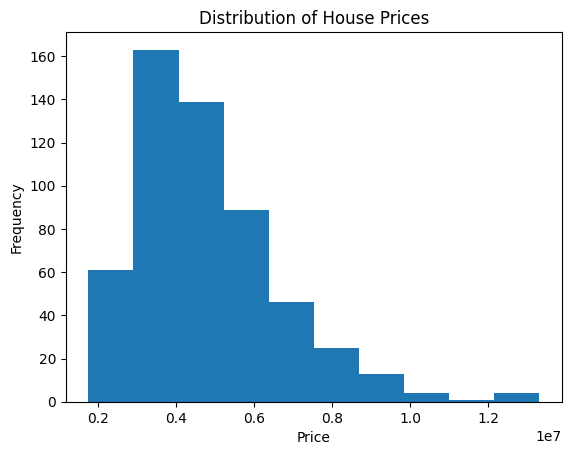

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your Pandas DataFrame
plt.hist(data['price'])  # Replace 'target_variable' with 'price'
plt.xlabel("Price")  # Add an x-axis label
plt.ylabel("Frequency")  # Add a y-axis label
plt.title("Distribution of House Prices")  # Add a title
plt.show()

* Handling Missing Values:

In [ ]:
import pandas as pd

# Handling Missing Values:
for column in data.select_dtypes(include=['number']).columns:  # Select numerical columns
    if data[column].isnull().any():  # Check if column has any missing values
        data[column].fillna(data[column].mean(), inplace=True)
        print(f"Imputed missing values in column: {column}")
    else:
        print(f"No missing values found in column: {column}")


No missing values found in column: price
No missing values found in column: area
No missing values found in column: bedrooms
No missing values found in column: bathrooms
No missing values found in column: stories
No missing values found in column: parking


3. Feature Selection

* Correlation Analysis:

Correlation analysis helps us understand the relationships between different features in the dataset and the target variable (price). It identifies which features have a strong influence on house prices. We use a correlation matrix (heatmap) to visualize these relationships. Features with high correlation are more likely to be important for prediction.

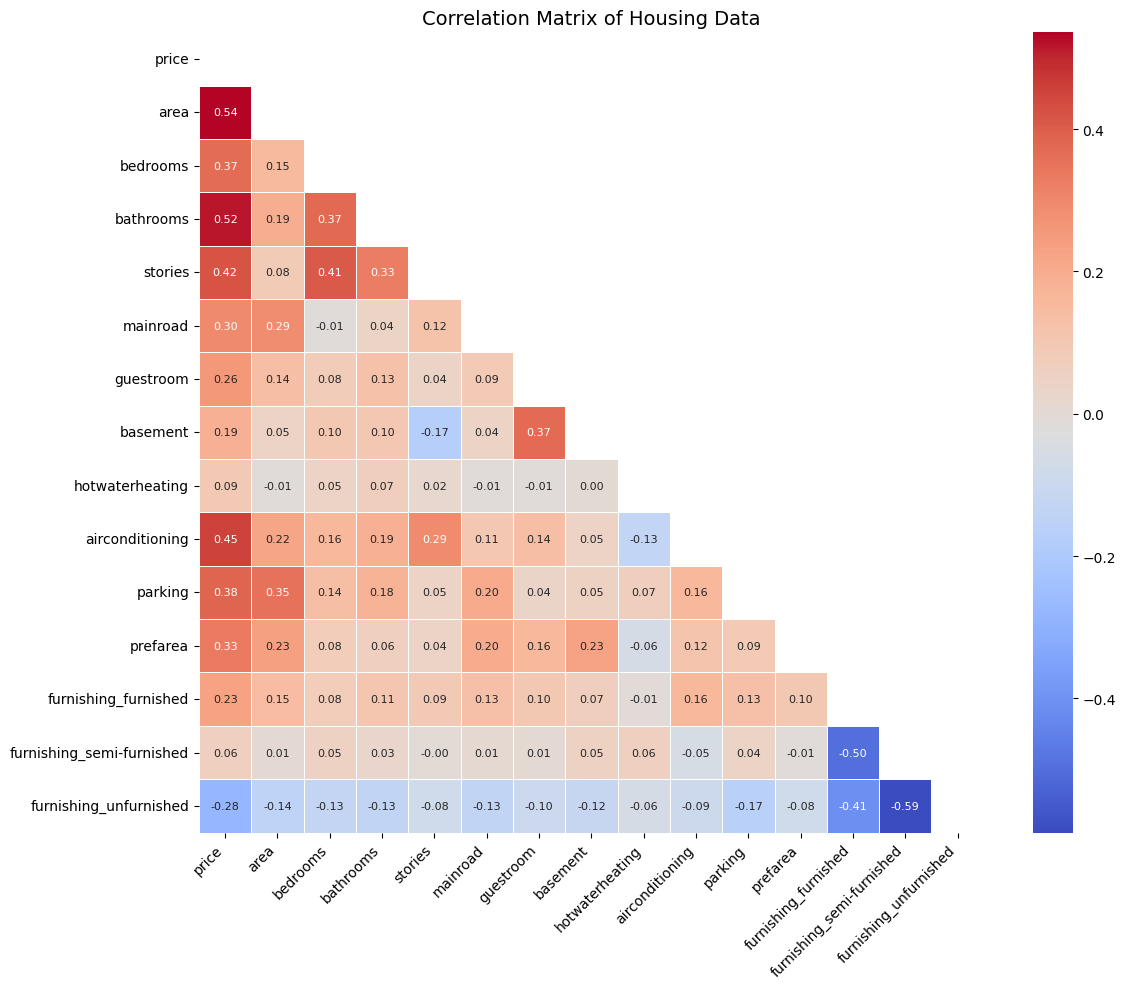

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Convert columns with 'yes'/'no' to 0/1
for column in data.select_dtypes(include=['object']).columns:
    if data[column].isin(['yes', 'no']).all():
        data[column] = data[column].map({'yes': 1, 'no': 0})
    # Handle 'furnishingstatus' column: convert to numerical using one-hot encoding
    elif column == 'furnishingstatus':
        # Create dummy variables (one-hot encoding)
        furnishing_dummies = pd.get_dummies(data['furnishingstatus'], prefix='furnishing')

        # Concatenate dummy variables to the DataFrame
        data = pd.concat([data, furnishing_dummies], axis=1)

        # Drop the original 'furnishingstatus' column
        data.drop('furnishingstatus', axis=1, inplace=True)


# Now calculate the correlation matrix and create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size for better visibility
correlation_matrix = data.corr()

# Mask upper triangle for better readability (optional)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Customize heatmap appearance
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            annot_kws={"size": 8}, mask=mask, linewidths=.5)

plt.title("Correlation Matrix of Housing Data", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

4. Model Training

In this step, we use the selected features and the target variable to train a linear regression model. The model learns patterns from the training data to make predictions. We split the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select your features - Replace with actual column names from your DataFrame
# Here's an example assuming 'area', 'bedrooms', and 'bathrooms' are your features:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
            'furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']

X = data[features]
y = data['price']  # Assuming 'price' is your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

5. Model Evaluation

We evaluate the trained model using metrics like Mean Squared Error (MSE) and R-squared. MSE measures the average squared difference between actual and predicted prices, while R-squared indicates the proportion of variance in house prices explained by the model. Lower MSE and higher R-squared values suggest a better model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


6. Visualization

Visualization helps us understand the model's predictions and their relationship with actual values. We can use scatter plots to compare actual vs. predicted prices. This allows us to visually assess the model's fit and identify potential areas for improvement.



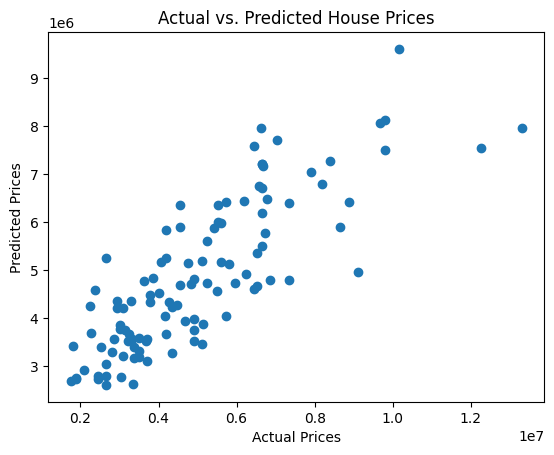

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

**Project Outcomes**

The project's outcome is a trained linear regression model that can predict house prices based on given features. The model's performance is evaluated using relevant metrics, and visualizations help understand its strengths and limitations. The project demonstrates the application of linear regression for predictive modeling in real-world scenarios.